## 1. Importanto as bibliotecas

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plot

#configurando o tamanho das imagens que serão mostradas na tela
plot.rcParams["figure.figsize"] = (8,6)

## 2. Baixando imagens para testes


In [ ]:
!git clone https://github.com/mohammadimtiazz/standard-test-images-for-Image-Processing.git
!mv standard-test-images-for-Image-Processing/standard_test_images/* ./

Cloning into 'standard-test-images-for-Image-Processing'...
remote: Enumerating objects: 37, done.
remote: Total 37 (delta 0), reused 0 (delta 0), pack-reused 37
Unpacking objects: 100% (37/37), done.


## 3. Abrindo a imagem e armazenando dentro de uma variável
 - Note que a imagem está sendo aberta no formato grayscale (níveis de cinza)
 - Depois teste a abertura de outras imagens

In [ ]:
imgEntrada = cv.imread("jetplane.tif", cv.IMREAD_GRAYSCALE)

In [ ]:
pixel = (0, 0)
print("Pixel (0,0) vale = ", imgEntrada[pixel] )

print("Pixel (0,0) vale = ", imgEntrada[0, 0] )


#alterar o valor
imgEntrada[0, 0] = 200

print("Pixel (0,0) vale = ", imgEntrada[0, 0] )

Pixel (0,0) vale =  193
Pixel (0,0) vale =  193
Pixel (0,0) vale =  200


## 4. Exibindo a imagem com a biblioteca *matplotlib*

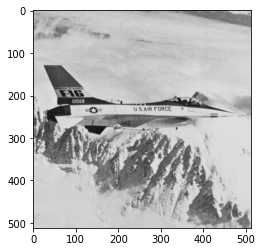

In [ ]:
plot.imshow(imgEntrada, vmax=255, vmin=0, cmap='gray')

## 5. Aplicando o algoritmo de filtragem ``Negativo``
- Ideia do algoritmo:
> Para cada linha ``l`` da imagem 
>> Para cada coluna ``c`` da imagem
>>> ``valor`` =  **cálculo do filtro do negativo** \\
>>> ``imgSaida``[``l``][``c``] = ``valor``

- Note que o cálculo do filtro do negativo é:
 -  ``valor = 255 - imgEntrada[l][c]`` 

- Note também que a instrução abaixo cria uma matriz para armazenar a imagem de saída (ou seja, o resultado do processamento)
  -  ``imgSaida = np.zeros( (quantLinhas, quantColunas), dtype='uint8' )
``

In [ ]:
quantLinhas = np.size(imgEntrada, 0)
quantColunas = np.size(imgEntrada, 1)

imgSaida = np.zeros( (quantLinhas, quantColunas), dtype='uint8' )

for l in range(quantLinhas):
  for c in range(quantColunas):
    
    #calculo do processamento da imagem para o pixel (l, c)
    #255 (claro), 0 (escuro)
    #       255 (claro) -  0 (escuro) => 255 (claro)
    #       255 (claro) - 255 (claro) => 0 (escuro)
    valor = 255 - imgEntrada[l][c]

    #armazenando na imagem de saída o resultado do processamento da imagem para o pixel (l,c)
    imgSaida[l][c] = valor

## 6. Exibindo a imagem de saída com a biblioteca *matplotlib*

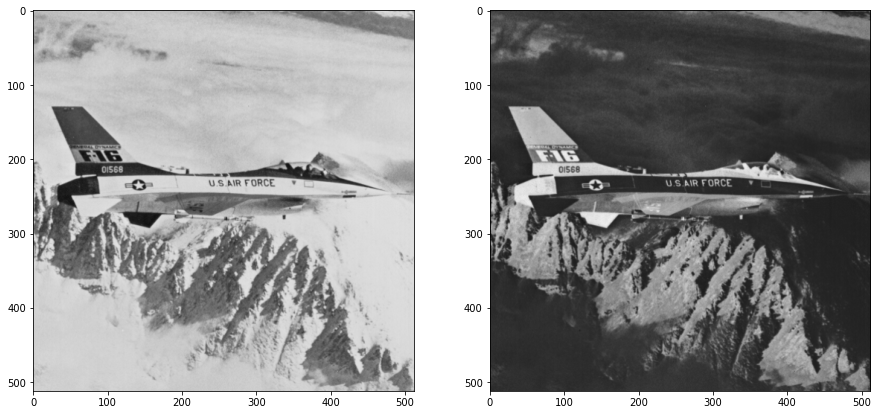

In [ ]:
#plot.imshow(imgSaida, vmax=255, vmin=0, cmap='gray')




#exibir as duas imagem: entrada e saida
fig, (plot1, plot2) = plot.subplots(1, 2, figsize=(15,15))

plot1.imshow( cv.cvtColor(imgEntrada, cv.COLOR_GRAY2RGB), label="Entrada" )
plot2.imshow( cv.cvtColor(imgSaida, cv.COLOR_GRAY2RGB), label="imagem filtrada" )

# Exercício 1: Construa um filtro para aumentar brilho de forma linear usando a seguinte formula:
$$\text{imgSaida}[l][c] = \min\{255, \text{imgEntrada}[l][c] \times k \}$$
onde $k \geq 0 $ é o fator de modificação do brilho fornecido pelo o usuário do filtro.

Exemplo de entrada e saída:
 - Se k = 2 e imgEntrada[l][c] = 100 então imgSaida[l][c] = 200
$$\min\{255, 100 \times 2 \}$$
$$\min\{255, 200 \}$$
$$= 200$$

 - Se k = 2 e imgEntrada[l][c] = 200 então imgSaida[l][c] = 255
$$\min\{255, 200 \times 2 \}$$
$$\min\{255, 400 \}$$
$$= 255$$

 - Se k = 2 e imgEntrada[l][c] = 0 então imgSaida[l][c] = 0


Text(0.5, 1.0, 'Saída')

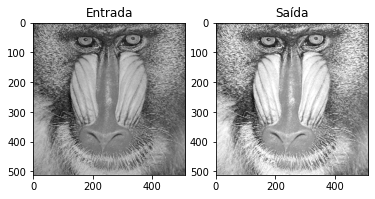

In [ ]:
k = 2.3 #porcetagem de aumento/diminuição do brilho

#passo 1: abrir uma imagem
imgEntrada = cv.imread("mandril_gray.tif", cv.IMREAD_GRAYSCALE)

#passo 2: adquirir as dimensões da imagem 
quantLinhas = np.size(imgEntrada, 0)
quantColunas = np.size(imgEntrada, 1)

#passo 3: criar uma imagem de saída 
imgSaida = np.zeros( (quantLinhas, quantColunas), dtype="uint8" )

#passo 4: Fazer os laços encadeados para varrer as imagens
for l in range(quantLinhas):
  for c in range(quantColunas):

    #passo 4.1: Fazer o calculo do filtro
    valor = min(255, imgEntrada[l, c] * k)

    #passo 4.2: Armazenar o calculo do filtro na imagem de saída
    imgSaida[l, c] = valor


#passo 5: exibir as imagens
plot.subplot(1,2,1)
plot.imshow(imgEntrada, vmax=255, vmin=0, cmap='gray')
plot.title('Entrada')

plot.subplot(1,2,2)
plot.imshow(imgSaida, vmax=255, vmin=0, cmap='gray')
plot.title('Saída')

# Exercício 2: Construa um filtro para aumentar brilho de forma não-linear (função logarítmica) usando a seguinte formula:

$$\text{imgSaida}[l][c] = \frac{255}{\log_{10}(256)} \times \log_{10}( \text{imgEntrada}[l][c] +1)$$

- Dica: a função $log_{10}$ está implementada no pacote ``math``

Text(0.5, 1.0, 'Saída')

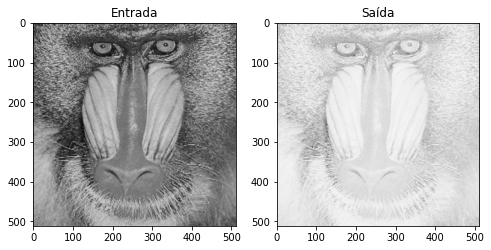

In [ ]:
import math

#passo 1: abrir uma imagem
imgEntrada = cv.imread("mandril_gray.tif", cv.IMREAD_GRAYSCALE)

#passo 2: adquirir as dimensões da imagem 
quantLinhas = np.size(imgEntrada, 0)
quantColunas = np.size(imgEntrada, 1)

#passo 3: criar uma imagem de saída 
imgSaida = np.zeros( (quantLinhas, quantColunas), dtype="uint8" )

#passo 4: Fazer os laços encadeados para varrer as imagens
for l in range(quantLinhas):
  for c in range(quantColunas):

    #passo 4.1: Fazer o calculo do filtro
    valor = ( 255 / math.log10(256) ) * math.log10(imgEntrada[l,c] + 1) 

    #passo 4.2: Armazenar o calculo do filtro na imagem de saída
    imgSaida[l, c] = valor


#passo 5: exibir as imagens
plot.subplot(1,2,1)
plot.imshow(imgEntrada, vmax=255, vmin=0, cmap='gray')
plot.title('Entrada')

plot.subplot(1,2,2)
plot.imshow(imgSaida, vmax=255, vmin=0, cmap='gray')
plot.title('Saída')
